In [1282]:
#import tensorflow as tf
#import keras 
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from scipy.signal import find_peaks,find_peaks_cwt
#from keras.models import Sequential
#from keras.layers import Dense, Conv1D,MaxPooling1D,Flatten,AvgPool1D
#from keras import layers
from sklearn.metrics import mean_squared_error as mse
import numpy as np
from sklearn.decomposition import PCA
from scipy.signal import hilbert
#from keras.models import Sequential
import scipy.io
from sklearn.feature_selection import mutual_info_regression as mi
#from keras.layers import Dense
from scipy.signal import savgol_filter
#import chirplet as ch

In [1283]:
import numpy as np
from scipy.signal import hilbert
from scipy.fftpack import fft, fftfreq
from cmath import phase

#def gaussian_chirplet(t, alpha1=1., alpha2=0., beta=2., fc=1., phi=0., tau=0.):
def gaussian_chirplet_new(t,params_list):
    beta = params_list[0]
    fc = 0.3
    phi = params_list[1]
    tau = 0
    y = beta * np.hanning(len(t))*np.exp(1j * 2 * np.pi * fc * (t - tau)
        + 1j * phi + 1j * 0 * (t - tau) ** 2)
    
    return y


def estimate_gaussian_chirplet_parameters_new(y, t):
    # Determine sampling frequency
    dt = t[1] - t[0]
    fs = 1 / dt

    # Estimate tau and beta from envelope
    env = abs(hilbert(y))
    index = np.argmax(env)
    beta = env[index]
    alpha1 = 0
    alpha2 = 0
    fc=0.3
    # Estimate phi using tau
    analytic = hilbert(y)
    phi = phase(analytic[index] / beta)

    # Estimate center frequency by finding peak in spectrum
    #alpha1=0.15
#    alpha2 = 0
    #return {'alpha1':alpha1, 'alpha2':alpha2, 'beta':beta, 'fc':fc, 'phi':phi, 'tau':tau}
    return [alpha1,alpha2,beta,fc,phi,0]

In [1284]:
X_df = pd.read_csv('X.csv').drop('Unnamed: 0',axis=1)
X_right_profile =  pd.read_csv('right_profiles.csv').drop('Unnamed: 0',axis=1)
X_left_profile =  pd.read_csv('left_profiles.csv').drop('Unnamed: 0',axis=1)

In [1285]:
defect_profile = []
for i in range(len(X_right_profile)):
  right_defect = np.array(X_right_profile.loc[i])
  left_defect = np.array(X_left_profile.loc[i])
  profile = np.array([right_defect,left_defect])
  defect_profile.append(profile.T)

In [1286]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=10)
cluster_pred = k_means.fit_predict(X_right_profile)

In [1287]:
Y = pd.read_csv('ch_trans_params_sorted.csv').drop('Unnamed: 0',axis=1)
p=5
Y_array = np.array(Y['Start']).reshape(1000,p)

In [1288]:
X_right_profile.columns = X_right_profile.columns.astype(int)
X_param = X_right_profile[np.flip(np.argsort(mi(X_right_profile,Y_array[:,1])))[0:10]]

In [1289]:
defect_profile = np.array(defect_profile)

In [1290]:
X_param = np.load('X_param.npy')

In [1291]:
X_param = np.array(X_param)
#X_param = defect_profile

In [1292]:
new_X_param = []
for x in range(len(X_param)):
  new_X_param.append(X_param[x].reshape(30,9))

In [1293]:
X_param = np.array(new_X_param )

In [1294]:
Y = pd.read_csv('ch_trans_params_sorted.csv').drop('Unnamed: 0',axis=1)

In [1295]:
Y.loc[Y['beta'].argmax()]

beta       3.093651
phi       -1.806429
Start    404.000000
Name: 1606, dtype: float64

In [1296]:
Y_array = np.array(Y).reshape(1000,p*len(Y.loc[0]))

In [1297]:
y_start = np.array(Y['Start']).reshape(1000,p)

In [1298]:
index_list = np.arange(0,1000)
np.random.shuffle(index_list)
train_list = index_list[0:int(len(index_list)*0.90)]
test_list = index_list[int(len(index_list)*0.90):]

In [1299]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(X_param[train_list].reshape(900,X_param[0].shape[0]*X_param[0].shape[1]))

MinMaxScaler()

In [1300]:
X_train, X_test = minmax.transform(X_param[train_list].reshape(900,X_param[0].shape[0]*X_param[0].shape[1])), minmax.transform(X_param[test_list].reshape(100,X_param[0].shape[0]*X_param[0].shape[1]))
X_train = X_train.reshape(900,X_param[0].shape[0],X_param[0].shape[1])
X_test = X_test.reshape(100,X_param[0].shape[0],X_param[0].shape[1])

y_train, y_test = y_start[train_list,0], y_start[test_list,0]

In [1301]:
#model = Sequential()
#model.add(Conv1D(filters=128, kernel_size=5, input_shape=(X_param[0].shape[0], X_param[0].shape[1]),activation='tanh'))

#model.add(MaxPooling1D(pool_size=5))
#model.add(Conv1D(filters=128, kernel_size=5, input_shape=(30, 5),activation='tanh'))
#model.add(Conv1D(filters=128, kernel_size=5, input_shape=(30, 5)))

#model.add(Conv1D(filters=128, kernel_size=5, input_shape=(30, 5)))
#model.add(MaxPooling1D(pool_size=5))
#model.add(Dense(40,activation='tanh'))
#model.add(Flatten())
#model.add(Dense(20,activation='tanh'))
#model.add(Dense(10,activation='tanh'))
#model.add(Dense(1))
#opt = tf.keras.optimizers.Adam(learning_rate=0.01)
#model.compile(loss='mean_absolute_error', # one may use 'mean_absolute_error' as  mean_squared_error
                  #optimizer=opt)

In [1302]:
#model.fit(X_train,y_train,batch_size=20,epochs=1000)
#pred = model.predict(X_test)

In [1303]:
y_phi = np.array(Y['phi']).reshape(1000,p)
y_start = np.array(Y['Start']).reshape(1000,p)
y_beta = np.array(Y['beta']).reshape(1000,p)
col_values = [y_phi,y_start,y_beta]
col_names = ['phi','Start','beta']
def check_correlation_plot(column_index):
  plt.figure(figsize=(20,8))
  for c in range(len(col_names)):
    value = np.array([col_values[c][:,0],col_values[column_index][:,1]]).T
                     #col_values[column_index][:,2],
                     #col_values[column_index][:,3],col_values[column_index][:,4]]).T
    value_columns = [col_names[c]+str(1),col_names[column_index]+str(2)]#col_names[column_index]+str(3),
                    #col_names[column_index]+str(4),col_names[column_index]+str(5)]
    value = pd.DataFrame(value,columns=value_columns)
    plt.subplot(1,3,c+1)
    sns.heatmap(value.corr(),annot=True, annot_kws={"size": 18})
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

In [1304]:

Y.loc[Y['beta'].argmax()-1],Y.loc[Y['beta'].argmax()]


(beta       1.754337
 phi        0.941446
 Start    402.000000
 Name: 1605, dtype: float64,
 beta       3.093651
 phi       -1.806429
 Start    404.000000
 Name: 1606, dtype: float64)

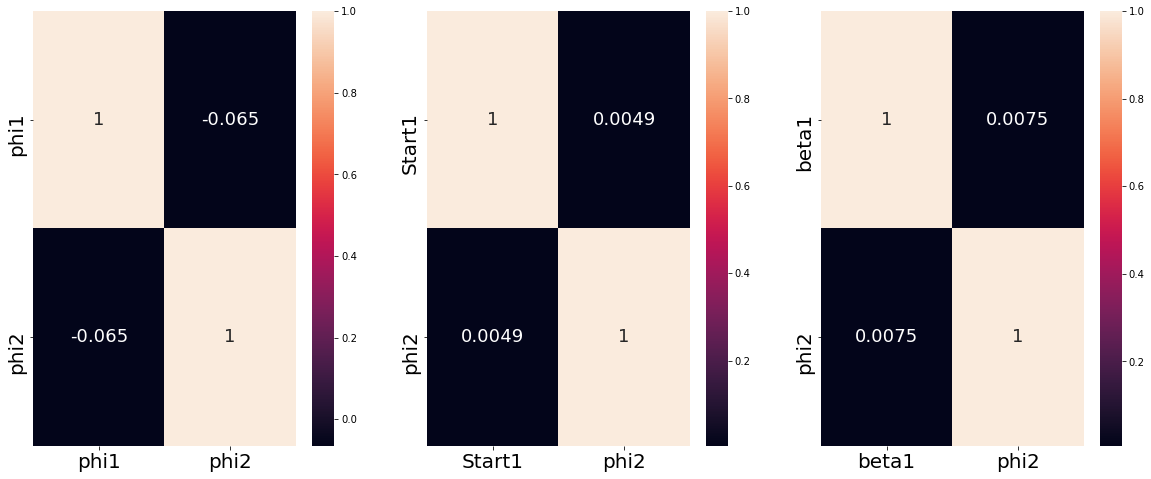

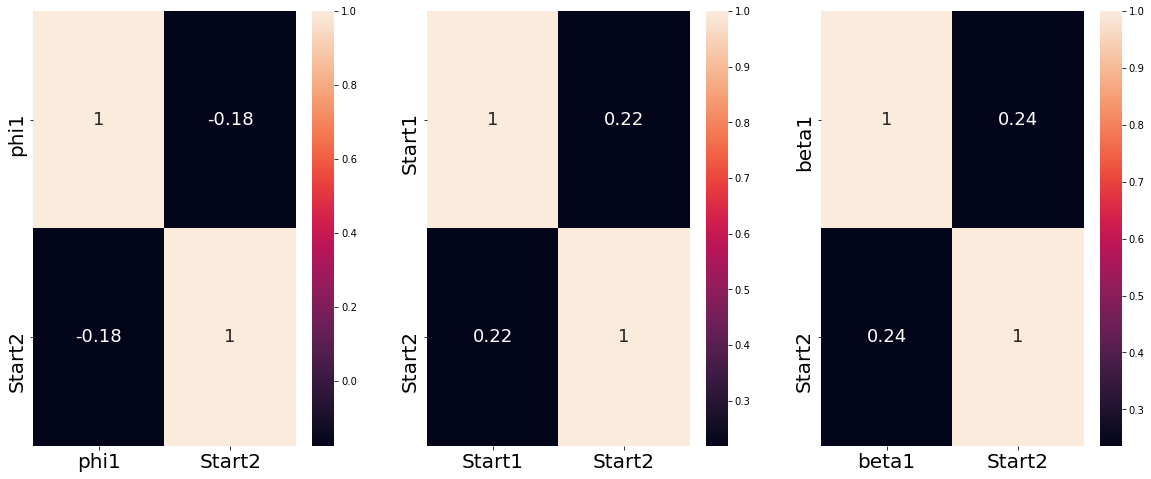

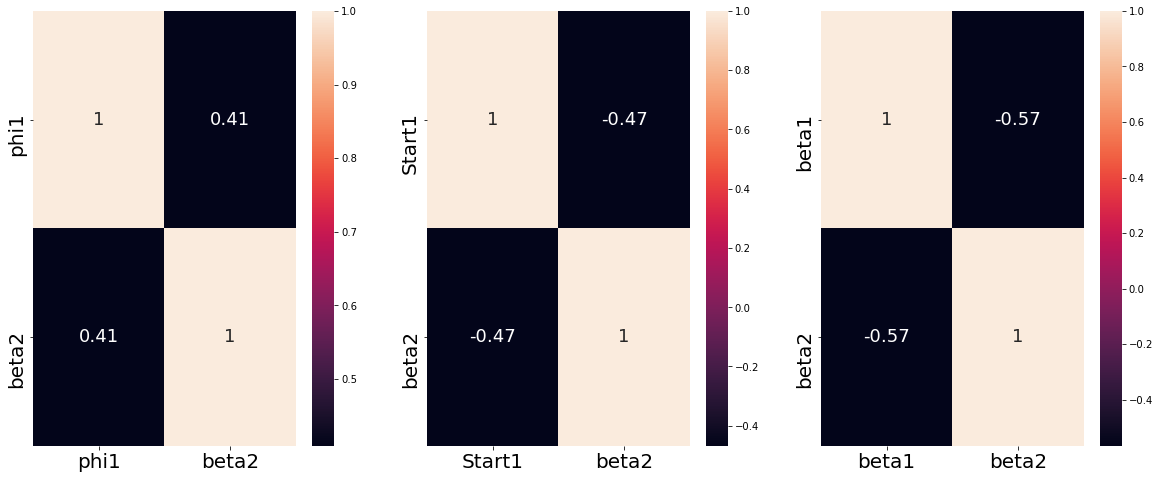

In [1305]:
check_correlation_plot(0)
plt.show()
check_correlation_plot(1)
plt.show()
check_correlation_plot(2)
plt.show()

In [1306]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(X_param[train_list].reshape(900,X_param[0].shape[0]*X_param[0].shape[1]))

MinMaxScaler()

In [1307]:
X_param = minmax.transform(X_param.reshape(1000,30*9))

In [1308]:
X_df = pd.DataFrame(X_param)

In [1309]:
#X_df = pd.read_csv('X.csv').drop('Unnamed: 0',axis=1)
X_right_profile =  pd.read_csv('right_profiles.csv').drop('Unnamed: 0',axis=1)
X_left_profile =  pd.read_csv('left_profiles.csv').drop('Unnamed: 0',axis=1)

[0.10485972 0.10437696 0.09524117 0.08712441 0.08701703 0.08347239
 0.08334834 0.08256615 0.08177734 0.08135949 0.08096311 0.08077112
 0.08048188 0.07906616 0.0760373  0.07292607 0.07215059 0.07041946
 0.07008572 0.06968471]


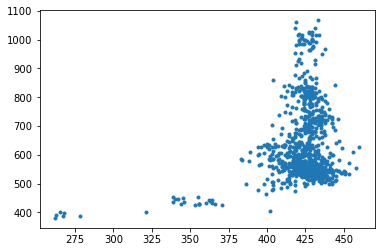

In [1310]:
X_right_profile =  pd.read_csv('right_profiles.csv').drop('Unnamed: 0',axis=1)
X_left_profile =  pd.read_csv('left_profiles.csv').drop('Unnamed: 0',axis=1)
X_right_profile.columns = X_right_profile.columns.astype(int)
X_left_profile.columns = X_left_profile.columns.astype(int)
#X_param = np.array(new_X_param)
#X_left_profile = pd.DataFrame(X_param)
X_right_profile.columns = X_left_profile.columns.astype(int)
y_start = np.array(Y['Start']).reshape(1000,p)
plt.plot(y_start[:,0],y_start[:,1],'.')
y_start = y_start[:,1]
numb_of_feat = 20
print(np.flip(np.sort(mi(X_left_profile,y_start)))[0:numb_of_feat])
X_param = X_left_profile[np.flip(np.argsort(mi(X_left_profile,y_start)))[0:numb_of_feat]]
#index_list = np.arange(0,1000)
#np.random.shuffle(index_list)
#train_list = index_list[0:int(len(index_list)*0.90)]
#test_list = index_list[int(len(index_list)*0.90):]
X_train = X_param.loc[train_list]
X_test = X_param.loc[test_list]
y_train = y_start[train_list]
y_test = y_start[test_list]

In [1311]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
n_estimators = [5,10,15,20,25,30,35,40,45,50,100]
random_grid = {'n_estimators': n_estimators}
rf = RandomForestRegressor()
rf_random = GridSearchCV(estimator = rf,param_grid=random_grid)

In [1312]:
rf_random.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          100]})

In [1313]:
mse(rf_random.predict(X_test),y_test)

14290.531014000002

In [1314]:
mse(rf_random.predict(X_test),y_test)

14290.531014000002

In [1315]:
#X_param = np.load('X_param.npy')
#new_X_param = []
#for x in range(len(X_param)):
#  new_X_param.append(X_param[x].reshape(30*9))
X_param = X_df
X_join = pd.concat([X_right_profile,X_param],axis=1)
X_join.columns = np.arange(0,len(X_join.T))

In [1316]:
dataset_collection = {'Right Profile':X_right_profile,'Left Profile':X_left_profile,
                      'New Dataset':X_param,'Joint Dataset':X_join}
n_estimators = [5,10,15,20,25,30,35,40,45,50,100]
random_grid = {'n_estimators': n_estimators}
dataset_names = list(dataset_collection.keys())

In [1317]:
def second_peak_predictions(dataset,target_feature,numb_of_feat=10):
  print('Selecting dataset = %s \n'%(dataset))
  X_data = dataset_collection[dataset]
  y_start = np.array(Y[target_feature]).reshape(1000,p)
  print('Selecting target = %s \n'%(target_feature))
  #plt.plot(y_start[:,0],y_start[:,1],'.')
  y_start = y_start[:,1]
  print('The %i most important feature has the following value of Mutual Information\n' %(numb_of_feat))
  print(np.flip(np.sort(mi(X_data,y_start)))[0:numb_of_feat])
  X_data = X_data[np.flip(np.argsort(mi(X_data,y_start)))[0:numb_of_feat]]
  print('Creating the dataset \n')
  index_list = np.arange(0,1000)
  np.random.shuffle(index_list)
  train_list = index_list[0:int(len(index_list)*0.90)]
  test_list = index_list[int(len(index_list)*0.90):]
  X_train = X_data.loc[train_list]
  X_test = X_data.loc[test_list]
  y_train = y_start[train_list]
  y_test = y_start[test_list]
  print('Hypertuning the model\n')
  rf = RandomForestRegressor()
  rf_random = GridSearchCV(estimator = rf,param_grid=random_grid)
  rf_random.fit(X_train,y_train)
  print('Predicting the value \n')
  pred = rf_random.predict(X_test)
  print('Execution is sucessful! \n')
  mse_pred = mse(pred,y_test)
  median_error = np.median(np.abs(pred-y_test))
  print('MSE is %.3f'%(mse_pred))
  print('Median error is %.3f'%(median_error))
  return {'Real Values':y_test, 'Predictions':pred,'MSE':mse_pred,'Mean Error':median_error}

In [1318]:
def first_peak_predictions(dataset,target_feature,numb_of_feat=10):
  print('Selecting dataset = %s \n'%(dataset))
  X_data = dataset_collection[dataset]
  y_start = np.array(Y[target_feature]).reshape(1000,p)
  print('Selecting target = %s \n'%(target_feature))
  #plt.plot(y_start[:,0],y_start[:,1],'.')
  y_start = y_start[:,0]
  print('The %i most important feature has the following value of Mutual Information\n' %(numb_of_feat))
  print(np.flip(np.sort(mi(X_data,y_start)))[0:numb_of_feat])
  X_data = X_data[np.flip(np.argsort(mi(X_data,y_start)))[0:numb_of_feat]]
  print('Creating the dataset \n')
  index_list = np.arange(0,1000)
  np.random.shuffle(index_list)
  train_list = index_list[0:int(len(index_list)*0.90)]
  test_list = index_list[int(len(index_list)*0.90):]
  X_train = X_data.loc[train_list]
  X_test = X_data.loc[test_list]
  y_train = y_start[train_list]
  y_test = y_start[test_list]
  print('Hypertuning the model\n')
  rf = RandomForestRegressor()
  rf_random = GridSearchCV(estimator = rf,param_grid=random_grid)
  rf_random.fit(X_train,y_train)
  print('Predicting the value \n')
  pred = rf_random.predict(X_test)
  print('Execution is sucessful! \n')
  mse_pred = mse(pred,y_test)
  median_error = np.median(np.abs(pred-y_test))
  print('MSE is %.3f'%(mse_pred))
  print('Median error is %.3f'%(median_error))
  return {'Real Values':y_test, 'Predictions':pred,'MSE':mse_pred,'Mean Error':median_error}

In [1319]:
Y.loc[5:9]

,beta,phi,Start
5,1.859856,-0.676480,424.0
6,0.483101,-1.123324,792.0
7,0.757217,1.818768,800.0
8,0.421768,-2.104274,813.0
9,1.280401,1.323648,970.0


In [1320]:
y_start = np.array(Y['Start']).reshape(1000,p)
y_start_zero = y_start[:,0]
pd.concat([dataset_collection['Right Profile'],pd.DataFrame(y_start_zero)],axis=1)

,0,1,2,3,4,5,6,7,8,9,...,232,233,234,235,236,237,238,239,240,0
0,-0.233811,-0.254208,-0.273056,-0.290296,-0.305914,-0.319940,-0.332440,-0.343510,-0.353271,-0.361855,...,-0.139795,-0.113854,-0.089637,-0.067570,-0.048021,-0.031293,-0.017620,-0.007162,0.0,433.0
1,0.212022,0.213851,0.216339,0.219319,0.222595,0.225945,0.229131,0.231904,0.234013,0.235220,...,0.058669,0.050103,0.042105,0.034567,0.027377,0.020424,0.013605,0.006824,0.0,424.0
2,-0.369374,-0.364390,-0.361128,-0.359605,-0.359787,-0.361590,-0.364884,-0.369493,-0.375201,-0.381765,...,-0.107820,-0.095335,-0.082135,-0.068406,-0.054366,-0.040254,-0.026321,-0.012822,0.0,424.0
3,-0.287333,-0.306203,-0.324565,-0.342615,-0.360519,-0.378409,-0.396376,-0.414470,-0.432700,-0.451039,...,-0.099197,-0.081263,-0.064774,-0.049842,-0.036545,-0.024921,-0.014974,-0.006683,0.0,446.0
4,0.769589,0.737430,0.704187,0.670222,0.635898,0.601572,0.567587,0.534265,0.501900,0.470747,...,-0.017874,-0.021883,-0.024583,-0.025749,-0.025140,-0.022507,-0.017598,-0.010171,0.0,418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.535726,0.520822,0.502165,0.480272,0.455707,0.429062,0.400937,0.371918,0.342562,0.313382,...,0.107296,0.093624,0.079805,0.065970,0.052235,0.038700,0.025445,0.012530,0.0,435.0
996,-0.191291,-0.218727,-0.244282,-0.268075,-0.290244,-0.310932,-0.330275,-0.348399,-0.365406,-0.381373,...,-0.158670,-0.133960,-0.109736,-0.086442,-0.064540,-0.044500,-0.026779,-0.011814,0.0,420.0
997,-0.944577,-0.958734,-0.968778,-0.974422,-0.975447,-0.971713,-0.963153,-0.949776,-0.931667,-0.908986,...,0.056606,0.044286,0.033476,0.024200,0.016460,0.010231,0.005465,0.002086,0.0,424.0
998,0.948502,0.966969,0.983952,0.999124,1.012141,1.022650,1.030298,1.034746,1.035677,1.032807,...,-0.004659,-0.009605,-0.012206,-0.012818,-0.011827,-0.009640,-0.006668,-0.003323,0.0,433.0


In [1321]:
# X_right_profile['help'] = y_start[:,0]
# X_right_profile['help'] = y_start[:,0]
# X_join['help'] = y_start[:,0]
# X_param['help'] = y_start[:,0]

In [1322]:
def second_peak_alldataset_prediction(target_feature,numb_of_feat=10):
    print('Creating the dataset \n')
    index_list = np.arange(0,1000)
    np.random.shuffle(index_list)
    train_list = index_list[0:int(len(index_list)*0.95)]
    test_list = index_list[int(len(index_list)*0.95):]
    print('Selecting target = %s \n'%(target_feature))
    y_start = np.array(Y[target_feature]).reshape(1000,p)
    y_start_zero = y_start[:,0]
    y_start = y_start[:,1]
    y_train = y_start[train_list]
    y_test = y_start[test_list]
    dataset_dicts = []
    for dataset in dataset_names:
        print('Selecting dataset = %s \n'%(dataset))
        X_data = dataset_collection[dataset]
        X_data = pd.concat([X_data,pd.DataFrame(y_start_zero)],axis=1)
        X_data.columns = np.arange(len(X_data.T))
        #plt.plot(y_start[:,0],y_start[:,1],'.')
        print('The %i most important feature has the following value of Mutual Information\n' %(numb_of_feat))
        print(np.flip(np.sort(mi(X_data,y_start)))[0:numb_of_feat])
        X_data = X_data[np.flip(np.argsort(mi(X_data,y_start)))[0:numb_of_feat]]
        X_train = X_data.loc[train_list]
        X_test = X_data.loc[test_list]
        print('Hypertuning the model\n')
        rf = RandomForestRegressor()
        rf_random = GridSearchCV(estimator = rf,param_grid=random_grid)
        rf_random.fit(X_train,y_train)
        print('Predicting the value \n')
        pred = rf_random.predict(X_test)
        print('Execution is sucessful! \n')
        mse_pred = mse(pred,y_test)
        median_error = np.median(np.abs(pred-y_test))
        print('MSE is %.3f'%(mse_pred))
        print('Median error is %.3f'%(median_error))
        dataset_dicts.append({'Real Values':y_test, 'Predictions':pred,'MSE':mse_pred,'Mean Error':median_error})
    return dataset_dicts


In [1323]:
print('Creating the dataset \n')
index_list = np.arange(0,1000)
np.random.shuffle(index_list)
train_list = index_list[0:int(len(index_list)*0.80)]
test_list = index_list[int(len(index_list)*0.80):]

Creating the dataset 



In [1324]:
def first_peak_alldataset_prediction(target_feature,numb_of_feat=20):

    print('Selecting target = %s \n'%(target_feature))
    y_start = np.array(Y[target_feature]).reshape(1000,p)
    y_start = y_start[:,0]
    y_train = y_start[train_list]
    y_test = y_start[test_list]
    dataset_dicts = []
    for dataset in dataset_names:
        print('Selecting dataset = %s \n'%(dataset))
        X_data = dataset_collection[dataset]
        #plt.plot(y_start[:,0],y_start[:,1],'.')
        print('The %i most important feature has the following value of Mutual Information\n' %(numb_of_feat))
        print(np.flip(np.sort(mi(X_data,y_start)))[0:numb_of_feat])
        X_data.columns = np.arange(0,len(X_data.T))
        X_data = X_data[np.flip(np.argsort(mi(X_data,y_start)))[0:numb_of_feat]]
        X_train = X_data.loc[train_list]
        X_test = X_data.loc[test_list]
        print('Hypertuning the model\n')
        rf = RandomForestRegressor()
        rf_random = GridSearchCV(estimator = rf,param_grid=random_grid)
        rf_random.fit(X_train,y_train)
        print('Predicting the value \n')
        pred = rf_random.predict(X_test)
        print('Execution is sucessful! \n')
        mse_pred = mse(pred,y_test)
        median_error = np.median(np.abs(pred-y_test))
        print('MSE is %.3f'%(mse_pred))
        print('Median error is %.3f'%(median_error))
        dataset_dicts.append({'Real Values':y_test, 'Predictions':pred,'MSE':mse_pred,'Mean Error':median_error,'Test List Index':test_list})
    return dataset_dicts



In [1325]:
start_prediction = first_peak_alldataset_prediction('Start')
phi_prediction = first_peak_alldataset_prediction('phi')
beta_prediction = first_peak_alldataset_prediction('beta')

Selecting target = Start 

Selecting dataset = Right Profile 

The 20 most important feature has the following value of Mutual Information

[0.28556958 0.27571354 0.26475326 0.24763115 0.24759978 0.22314092
 0.22012387 0.19340753 0.19003088 0.18023257 0.17903288 0.1738856
 0.15874991 0.15753381 0.14732101 0.14404603 0.13621627 0.13364449
 0.12970476 0.12691654]
Hypertuning the model

Predicting the value 

Execution is sucessful! 

MSE is 196.088
Median error is 3.214
Selecting dataset = Left Profile 

The 20 most important feature has the following value of Mutual Information

[0.2793393  0.26172287 0.2599141  0.25649414 0.2439706  0.21880853
 0.20905619 0.18967017 0.18743546 0.18550439 0.18142274 0.17887807
 0.16924509 0.16501851 0.16179741 0.15888388 0.14787007 0.13583007
 0.13515052 0.12758561]
Hypertuning the model

Predicting the value 

Execution is sucessful! 

MSE is 181.546
Median error is 3.162
Selecting dataset = New Dataset 

The 20 most important feature has the following

In [1326]:
def summary_predictions(target_feature,dataset_prediction):
  predictions_right = dataset_prediction[0]
  predictions_left = dataset_prediction[1]
  predictions_new = dataset_prediction[2]
  predictions_jd = dataset_prediction[3]
  predictions = [predictions_right['Predictions'],predictions_left['Predictions'],
                     predictions_new['Predictions'],predictions_jd['Predictions']]
  predictions_mae = [predictions_right['Mean Error'],predictions_left['Mean Error'],
                    predictions_new['Mean Error'],predictions_jd['Mean Error']]
  print('The best dataset is %s with a Median Absolute Error of %.3f'%(dataset_names[np.argmin(predictions_mae)],np.min(predictions_mae)))
  pred_test = predictions_right['Real Values']
  plt.figure(figsize=(20,10))
  plt.suptitle('Prediction for target %s'%(target_feature),fontsize=30)
  for i in range(len(dataset_names)):
    plt.subplot(2,2,i+1)
    plt.title('Dataset Used : %s'%(dataset_names[i]))
    plt.plot(pred_test,color='darkorange',label='Real Values')
    plt.plot(predictions[i],color='navy',label='Prediction')
    #plt.ylim(380,500)
    plt.legend()

The best dataset is Left Profile with a Median Absolute Error of 3.162


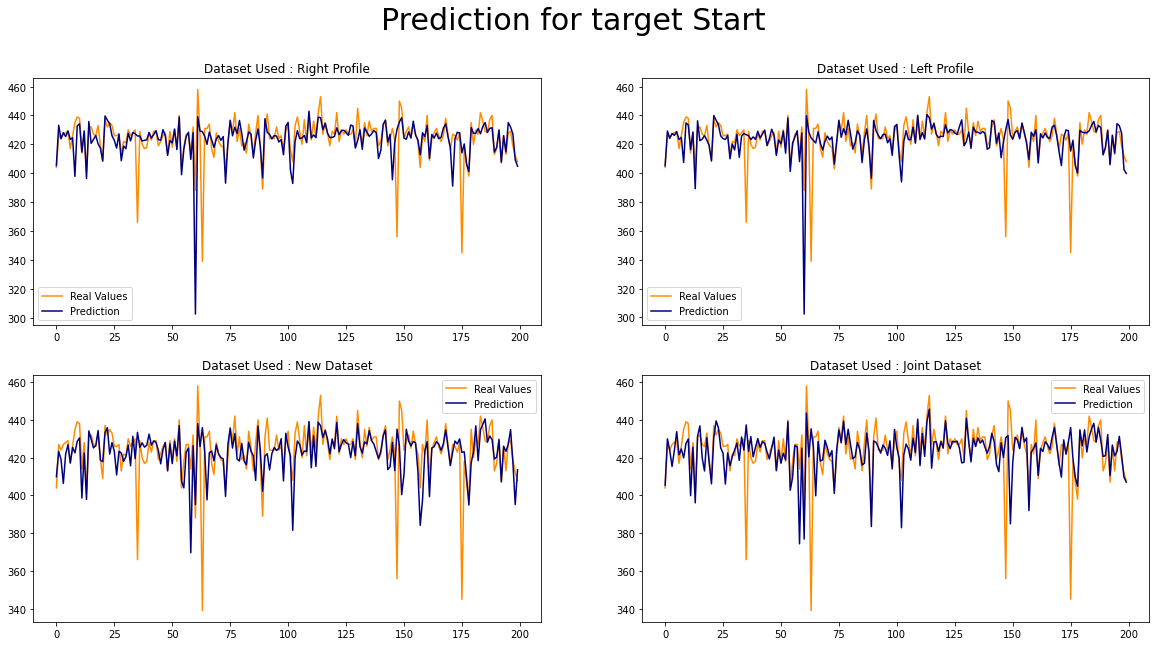

In [1327]:
summary_predictions('Start',start_prediction)


The best dataset is Right Profile with a Median Absolute Error of 0.090


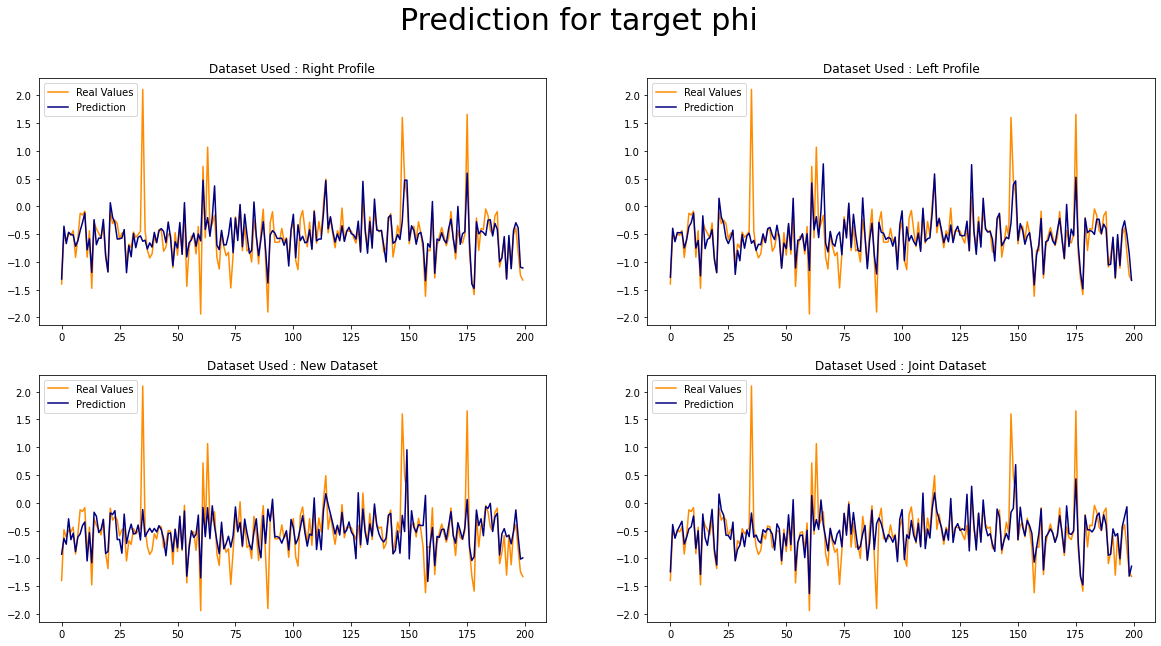

In [1328]:
summary_predictions('phi',phi_prediction)

The best dataset is Right Profile with a Median Absolute Error of 0.040


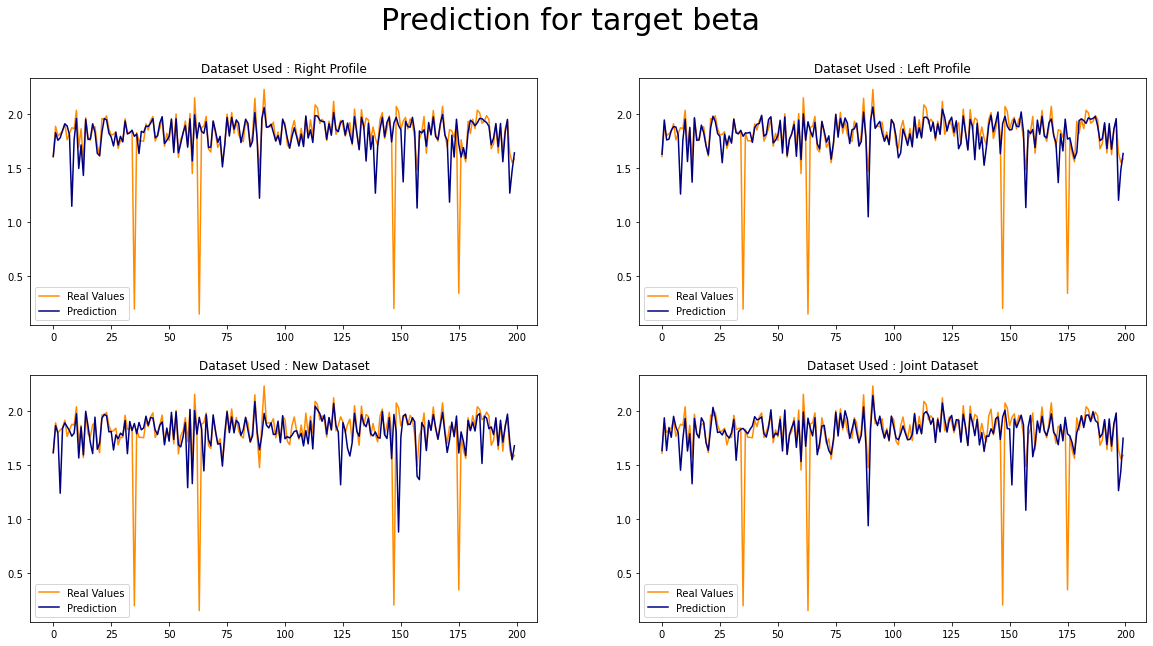

In [1329]:
summary_predictions('beta',beta_prediction)

In [1330]:
Y.loc[799*5]

beta       1.994632
phi        0.268813
Start    445.000000
Name: 3995, dtype: float64

In [1331]:
test_list

array([916, 599, 458, 893, 410, 389, 450, 448, 675, 800, 579, 380,  93,
       587, 728, 417, 659, 469, 777, 650, 798, 718, 132, 984, 259, 236,
       442, 116,  96, 500,  79, 721, 467, 176, 957,  45, 860, 626, 376,
       161, 226, 563, 862, 691, 283, 117, 433, 272, 115, 922, 962, 609,
       396, 556, 214,  29,  62, 627, 968, 297, 945, 684, 454, 425, 670,
       414, 428, 126, 869, 555, 285, 435, 878, 986, 123, 947, 651,  99,
       521, 845, 353,  86, 564,  67, 138, 311, 719, 827,   4, 645, 753,
       250, 531, 696,   8, 486,  42, 638, 661, 712, 960, 228, 537, 439,
       174, 520, 959, 828, 281, 204, 644, 432, 332,  78, 910, 505, 618,
       966, 106, 652, 635, 704, 165, 540, 160, 118, 667, 620, 299, 567,
       444, 952, 287, 690, 496, 251, 891, 974, 388, 834, 369, 694, 491,
       504, 911, 999, 484, 603,  26, 195,   1, 796, 883, 339, 235, 392,
       121, 263, 306, 917, 979, 831, 242, 523, 243, 785,   6, 961, 135,
       155, 687, 779, 122, 575, 625,  25, 975, 707, 536, 995, 99

In [1332]:
Y_first = Y.loc[test_list*5]

In [1333]:
Y_first

,beta,phi,Start
4580,1.607796,-1.399189,404.0
2995,1.887781,-0.486194,427.0
2290,1.798531,-0.622175,424.0
4465,1.820547,-0.493644,427.0
2050,1.841102,-0.523692,428.0
...,...,...,...
1675,1.865242,-0.510149,428.0
915,1.939669,-0.392156,429.0
2155,1.640212,-0.835408,419.0
875,1.554570,-1.246992,412.0


In [1334]:
start,beta,phi = start_prediction[2]['Predictions'],beta_prediction[2]['Predictions'],phi_prediction[2]['Predictions']

In [1335]:
first_pred_df = pd.DataFrame([start,beta,phi]).T
first_pred_df.columns = ['Start','beta','phi']

In [1336]:
t = np.linspace(-5,5,500)
signal_test = []
signal_pred = []
j=0
for i in Y_first.index:
    y = Y_first.loc[i]
    first_signal = np.zeros(5000)
    first_signal[int(y['Start'])-250:int(y['Start'])+250]=np.real(gaussian_chirplet_new(t,[y['beta'],y['phi']]))
    first_pred = np.zeros(5000)
    y = first_pred_df.loc[j]
    first_pred[int(y['Start'])-250:int(y['Start'])+250]=np.real(gaussian_chirplet_new(t,[y['beta'],y['phi']]))
    signal_pred.append(first_pred)
    signal_test.append(first_signal)
    j=j+1

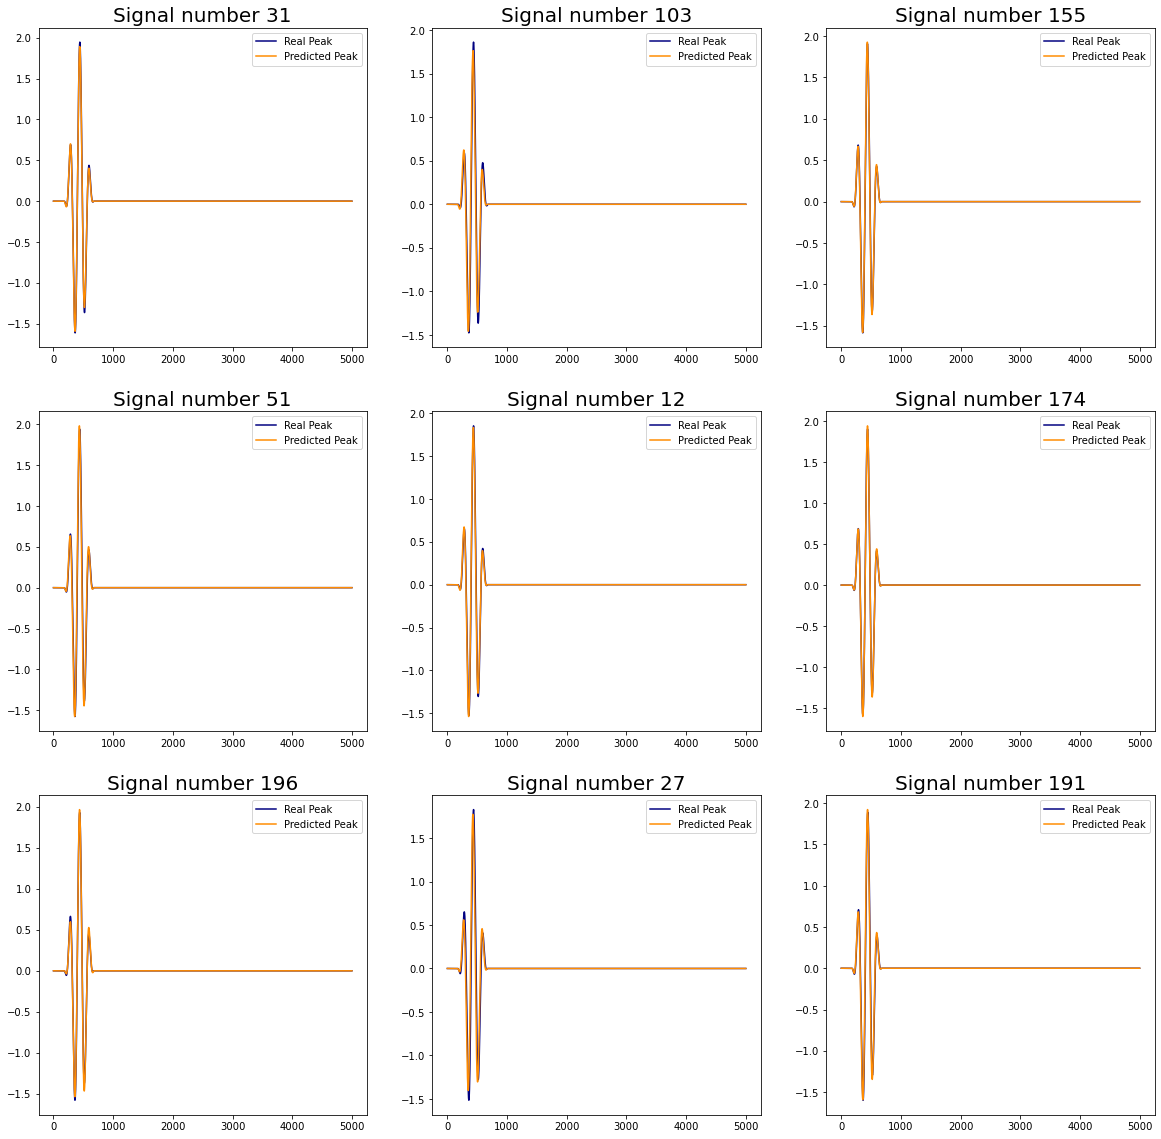

In [1339]:
J = np.random.choice(200,9)
i=1
plt.figure(figsize=(20,20))
for j in J:
    plt.subplot(3,3,i)
    plt.title('Signal number %i'%(j),fontsize=20)
    plt.plot(signal_test[j],color='navy',label='Real Peak')
    plt.plot(signal_pred[j],color='darkorange',label='Predicted Peak')
    plt.legend()
    i=i+1

In [1340]:
Y.loc[train_list]

,beta,phi,Start
929,0.234665,-1.775653,1937.0
632,0.330634,1.932602,703.0
136,0.372299,-3.025870,716.0
0,1.982544,-0.248515,433.0
16,0.628758,-2.146505,725.0
...,...,...,...
405,1.663621,-1.164098,408.0
171,0.587444,-1.960207,560.0
98,1.269683,2.500473,1012.0
134,1.272953,2.168166,995.0


In [1341]:
X_data = dataset_collection['Right Profile']
X_data

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,240
0,-0.233811,-0.254208,-0.273056,-0.290296,-0.305914,-0.319940,-0.332440,-0.343510,-0.353271,-0.361855,...,-0.166994,-0.139795,-0.113854,-0.089637,-0.067570,-0.048021,-0.031293,-0.017620,-0.007162,0.0
1,0.212022,0.213851,0.216339,0.219319,0.222595,0.225945,0.229131,0.231904,0.234013,0.235220,...,0.067908,0.058669,0.050103,0.042105,0.034567,0.027377,0.020424,0.013605,0.006824,0.0
2,-0.369374,-0.364390,-0.361128,-0.359605,-0.359787,-0.361590,-0.364884,-0.369493,-0.375201,-0.381765,...,-0.119443,-0.107820,-0.095335,-0.082135,-0.068406,-0.054366,-0.040254,-0.026321,-0.012822,0.0
3,-0.287333,-0.306203,-0.324565,-0.342615,-0.360519,-0.378409,-0.396376,-0.414470,-0.432700,-0.451039,...,-0.118423,-0.099197,-0.081263,-0.064774,-0.049842,-0.036545,-0.024921,-0.014974,-0.006683,0.0
4,0.769589,0.737430,0.704187,0.670222,0.635898,0.601572,0.567587,0.534265,0.501900,0.470747,...,-0.012759,-0.017874,-0.021883,-0.024583,-0.025749,-0.025140,-0.022507,-0.017598,-0.010171,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.535726,0.520822,0.502165,0.480272,0.455707,0.429062,0.400937,0.371918,0.342562,0.313382,...,0.120677,0.107296,0.093624,0.079805,0.065970,0.052235,0.038700,0.025445,0.012530,0.0
996,-0.191291,-0.218727,-0.244282,-0.268075,-0.290244,-0.310932,-0.330275,-0.348399,-0.365406,-0.381373,...,-0.183455,-0.158670,-0.133960,-0.109736,-0.086442,-0.064540,-0.044500,-0.026779,-0.011814,0.0
997,-0.944577,-0.958734,-0.968778,-0.974422,-0.975447,-0.971713,-0.963153,-0.949776,-0.931667,-0.908986,...,0.070388,0.056606,0.044286,0.033476,0.024200,0.016460,0.010231,0.005465,0.002086,0.0
998,0.948502,0.966969,0.983952,0.999124,1.012141,1.022650,1.030298,1.034746,1.035677,1.032807,...,0.002948,-0.004659,-0.009605,-0.012206,-0.012818,-0.011827,-0.009640,-0.006668,-0.003323,0.0


In [1418]:
def second_peak_alldataset_prediction(target_feature,numb_of_feat=10):
    #print('Creating the dataset \n')
    #index_list = np.arange(0,1000)
    #np.random.shuffle(index_list)
    #train_list = index_list[0:int(len(index_list)*0.95)]
    #test_list = index_list[int(len(index_list)*0.95):]
    print('Selecting target = %s \n'%(target_feature))
    y_start = np.array(Y[target_feature]).reshape(1000,p)
    y_start_zero = Y.loc[np.arange(0,5000,5)].reset_index().drop('index',axis=1)
    y_start = y_start[:,2]
    y_train = y_start[train_list]
    y_test = y_start[test_list]
    dataset_dicts = []
    for dataset in dataset_names:
        print('Selecting dataset = %s \n'%(dataset))
        X_data = dataset_collection[dataset]
        X_data = pd.concat([X_data,pd.DataFrame(y_start_zero)],axis=1)
        X_data.columns = np.arange(len(X_data.T))
        #plt.plot(y_start[:,0],y_start[:,1],'.')
        print('The %i most important feature has the following value of Mutual Information\n' %(numb_of_feat))
        print(np.flip(np.sort(mi(X_data,y_start)))[0:numb_of_feat])
        X_data = X_data[np.flip(np.argsort(mi(X_data,y_start)))[0:numb_of_feat]]
        X_train = X_data.loc[train_list]
        X_test = X_data.loc[test_list]
        print('Hypertuning the model\n')
        rf = RandomForestRegressor()
        rf_random = GridSearchCV(estimator = rf,param_grid=random_grid)
        rf_random.fit(X_train,y_train)
        print('Predicting the value \n')
        pred = rf_random.predict(X_test)
        print('Execution is sucessful! \n')
        mse_pred = mse(pred,y_test)
        median_error = np.median(np.abs(pred-y_test))
        print('MSE is %.3f'%(mse_pred))
        print('Median error is %.3f'%(median_error))
        dataset_dicts.append({'Real Values':y_test, 'Predictions':pred,'MSE':mse_pred,'Mean Error':median_error})
    return dataset_dicts

In [1419]:
start_second_prediction = second_peak_alldataset_prediction('Start',5)
phi_second_prediction = second_peak_alldataset_prediction('phi',5)
#tau_second_prediction = second_peak_alldataset_prediction('tau',30)
beta_second_prediction = second_peak_alldataset_prediction('beta',5)

Selecting target = Start 

Selecting dataset = Right Profile 

The 5 most important feature has the following value of Mutual Information

[0.15138069 0.131454   0.09259011 0.07523114 0.07473493]
Hypertuning the model

Predicting the value 

Execution is sucessful! 

MSE is 28238.633
Median error is 108.710
Selecting dataset = Left Profile 

The 5 most important feature has the following value of Mutual Information

[0.14963359 0.13377773 0.09245359 0.07440129 0.07328782]
Hypertuning the model

Predicting the value 

Execution is sucessful! 

MSE is 28084.646
Median error is 112.665
Selecting dataset = New Dataset 

The 5 most important feature has the following value of Mutual Information

[0.15873316 0.13413485 0.09665129 0.09437742 0.09280254]
Hypertuning the model

Predicting the value 

Execution is sucessful! 

MSE is 27415.996
Median error is 119.410
Selecting dataset = Joint Dataset 

The 5 most important feature has the following value of Mutual Information

[0.15154139 0.1322

In [1400]:
start_second_prediction

[{'Real Values': array([ 584.,  543.,  565.,  568.,  803.,  559.,  562.,  539.,  571.,
          779.,  574.,  572.,  527.,  634.,  711., 1015.,  550.,  521.,
          558.,  631.,  673.,  552.,  541.,  757.,  533.,  806.,  530.,
          601.,  555.,  540.,  582.,  814.,  538.,  544.,  541.,  431.,
          542.,  538.,  594.,  568.,  633.,  556.,  815.,  635.,  618.,
          829.,  552.,  870.,  517.,  798.,  564.,  554.,  510.,  512.,
          656.,  578.,  536.,  561.,  565.,  526.,  580.,  554.,  823.,
          435.,  929.,  587.,  755.,  582.,  570.,  557.,  556.,  593.,
          954.,  705.,  574.,  517.,  520.,  730.,  664.,  726.,  561.,
          823.,  519.,  798.,  682.,  558.,  544.,  732.,  600.,  609.,
          558.,  554.,  551.,  782.,  821.,  813.,  536.,  891.,  556.,
          822.,  529.,  530.,  539.,  553.,  568.,  536.,  561.,  684.,
          534.,  524.,  563.,  523.,  580.,  546.,  534.,  806.,  532.,
          576.,  577.,  564.,  549.,  725.,  572.

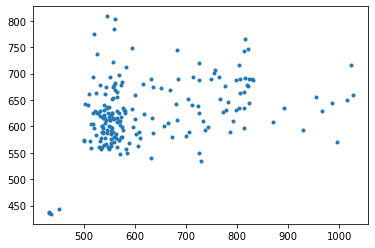

In [1401]:
#plt.plot(beta_second_prediction[0]['Real Values'],beta_second_prediction[1]['Predictions'],'.')
#plt.plot(beta_second_prediction[2]['Real Values'],beta_second_prediction[1]['Predictions'],'.')
plt.plot(start_second_prediction[0]['Real Values'],start_second_prediction[1]['Predictions'],'.')
#plt.xlim(1000,1100)

The best dataset is Joint Dataset with a Median Absolute Error of 0.899
The best dataset is Left Profile with a Median Absolute Error of 0.133


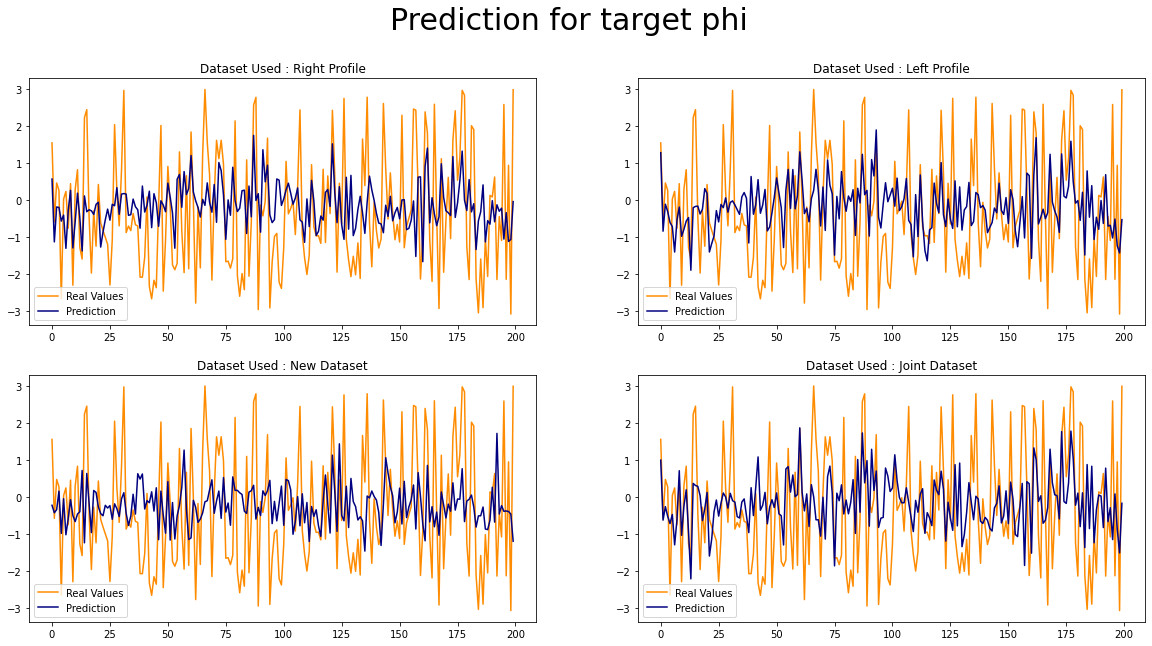

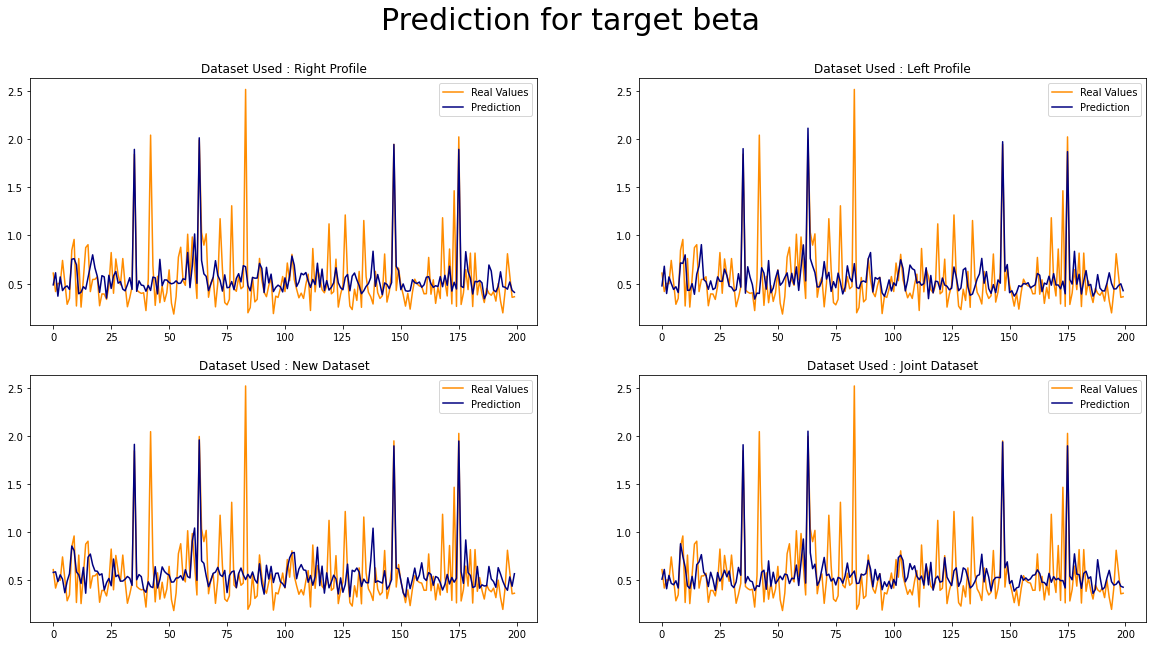

In [1402]:
summary_predictions('phi',phi_second_prediction)
summary_predictions('beta',beta_second_prediction)
#plt.ylim(0.6,1.5)

In [1403]:
pred_start = start_second_prediction[3]['Predictions']
pred_beta = beta_second_prediction[3]['Predictions']
pred_phi = phi_second_prediction[3]['Predictions']



In [1404]:
pred_df = pd.DataFrame([pred_start,pred_phi,pred_beta]).T

In [1405]:
pred_df.columns = ['Start','phi','beta'] 

In [1406]:
# forest = rf_random.best_estimator_
# import time
# import numpy as np

# start_time = time.time()
# importances = forest.feature_importances_
# std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
# elapsed_time = time.time() - start_time

# print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
# import pandas as pd
# feature_names = [f"feature {i}" for i in range(X_start.shape[1])]
# forest_importances = pd.Series(importances, index=feature_names)

# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

In [1407]:
y_prova = pd.DataFrame(np.array(Y).reshape(1000,3*p).T).T

In [1408]:
y_prova

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.982544,-0.248515,433.0,0.436805,-0.543326,542.0,0.562145,2.632883,816.0,1.425997,1.542488,974.0,0.361499,1.008550,1134.0
1,1.859856,-0.676480,424.0,0.483101,-1.123324,792.0,0.757217,1.818768,800.0,0.421768,-2.104274,813.0,1.280401,1.323648,970.0
2,1.811665,-0.612730,424.0,0.345430,2.053954,724.0,0.337604,-0.975552,748.0,0.899673,1.349062,978.0,0.374575,2.586691,1304.0
3,2.096202,0.184474,446.0,0.628758,-2.146505,725.0,1.568455,2.100924,1001.0,0.607230,-1.044112,1162.0,0.907185,1.873995,1169.0
4,1.762238,-0.953978,418.0,0.335220,2.787078,600.0,0.488805,-0.966173,799.0,0.838437,2.102628,801.0,1.557463,1.494604,979.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.934576,-0.212402,435.0,0.436598,-1.250590,531.0,0.563300,0.970774,976.0,0.392995,-0.155593,1152.0,0.286933,-2.860517,1457.0
996,1.820583,-0.795484,420.0,0.816300,-2.137454,558.0,1.168220,0.763095,560.0,0.440578,3.120031,805.0,1.098820,-1.436238,1071.0
997,1.891796,-0.673345,424.0,0.394885,2.114670,597.0,0.471109,3.051216,737.0,1.505640,-0.431357,930.0,0.393747,-1.417819,1093.0
998,1.976751,-0.458258,433.0,0.188230,-0.731068,543.0,0.398183,2.661825,791.0,0.799838,1.097817,967.0,0.377784,-2.682204,1358.0


In [1409]:
Y.loc[test_list+1]

,beta,phi,Start
917,0.547553,2.033295,1032.0
600,1.751732,-0.892012,419.0
459,0.475523,1.493679,1365.0
894,0.672953,1.981819,1031.0
411,0.283943,-1.524826,808.0
...,...,...,...
336,2.518193,-2.412882,798.0
184,1.643460,-0.895287,1238.0
432,0.961011,2.375228,1007.0
176,0.342563,-1.045398,692.0


In [1410]:
test_list + 1 

array([ 917,  600,  459,  894,  411,  390,  451,  449,  676,  801,  580,
        381,   94,  588,  729,  418,  660,  470,  778,  651,  799,  719,
        133,  985,  260,  237,  443,  117,   97,  501,   80,  722,  468,
        177,  958,   46,  861,  627,  377,  162,  227,  564,  863,  692,
        284,  118,  434,  273,  116,  923,  963,  610,  397,  557,  215,
         30,   63,  628,  969,  298,  946,  685,  455,  426,  671,  415,
        429,  127,  870,  556,  286,  436,  879,  987,  124,  948,  652,
        100,  522,  846,  354,   87,  565,   68,  139,  312,  720,  828,
          5,  646,  754,  251,  532,  697,    9,  487,   43,  639,  662,
        713,  961,  229,  538,  440,  175,  521,  960,  829,  282,  205,
        645,  433,  333,   79,  911,  506,  619,  967,  107,  653,  636,
        705,  166,  541,  161,  119,  668,  621,  300,  568,  445,  953,
        288,  691,  497,  252,  892,  975,  389,  835,  370,  695,  492,
        505,  912, 1000,  485,  604,   27,  196,   

In [1411]:
test_list[0]
Y.loc[test_list[0]]

beta        0.809817
phi        -2.130728
Start    1027.000000
Name: 916, dtype: float64

In [1412]:
Y_second = Y.loc[(test_list*5) + 1]

In [1413]:
X_prova = y_prova[[0,1,2]]
y = y_prova[5]
mi(X_prova,y)

array([0.18934088, 0.23930663, 0.22745715])

In [1414]:
t = np.linspace(-5,5,500)
signal_test = []
signal_pred = []
j=0
for i in range(len(Y_second.index)):
    y = Y_second.loc[Y_second.index[i]]
    first_signal = np.zeros(5000)
    first_signal[int(y['Start']):int(y['Start'])+500]=np.real(gaussian_chirplet_new(t,[y['beta'],y['phi']]))
    y = Y_first.loc[Y_first.index[i]]
    first_signal[int(y['Start']):int(y['Start'])+500]=first_signal[int(y['Start'])-0:int(y['Start'])+500]+np.real(gaussian_chirplet_new(t,[y['beta'],y['phi']]))
    first_pred = np.zeros(5000)
    y = pred_df.loc[j]
    first_pred[int(y['Start'])-0:int(y['Start'])+500]=np.real(gaussian_chirplet_new(t,[y['beta'],y['phi']]))
    y = first_pred_df.loc[j]
    first_pred[int(y['Start'])-0:int(y['Start'])+500]=first_pred[int(y['Start'])-0:int(y['Start'])+500]+np.real(gaussian_chirplet_new(t,[y['beta'],y['phi']]))
    signal_pred.append(first_pred)
    signal_test.append(first_signal)
    j=j+1

In [1415]:
Y_array = pd.read_csv('fullsignal.csv').drop('Unnamed: 0',axis=1)
Y_array = np.array(Y_array)

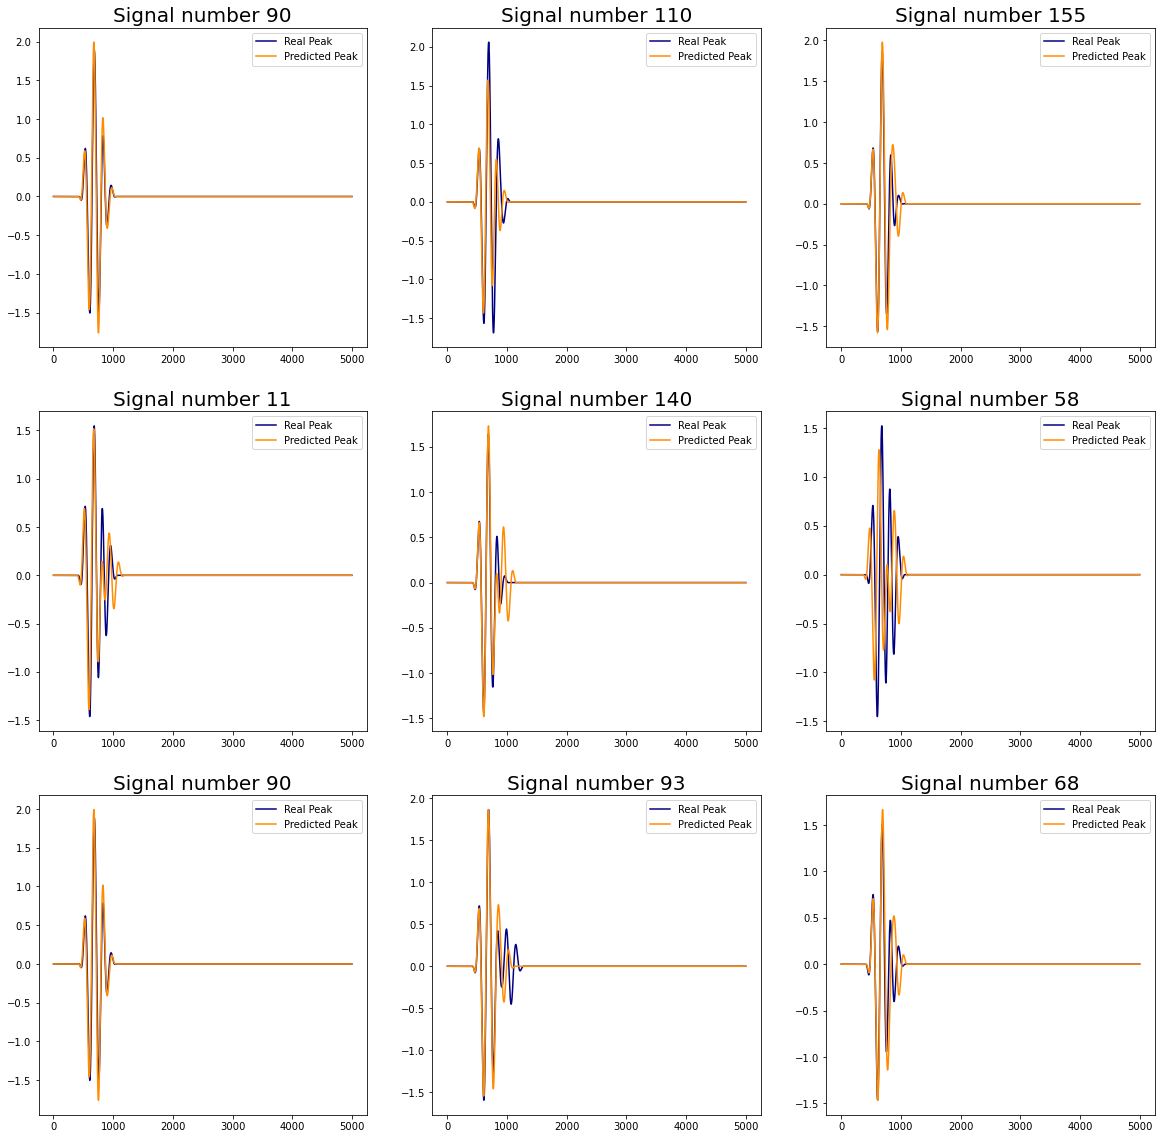

In [1417]:
J = np.random.choice(200,9)
i=1
plt.figure(figsize=(20,20))
for j in J:
    plt.subplot(3,3,i)
    plt.title('Signal number %i'%(j),fontsize=20)
    plt.plot(signal_test[j],color='navy',label='Real Peak')
    plt.plot(signal_pred[j],color='darkorange',label='Predicted Peak')
    #plt.plot(Y_array[test_list[j]],color='darkorange')
    plt.legend()
    i=i+1

In [19]:
import numpy as np
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
data_path = '/Users/paialupo/Desktop/Research Project/Surrogate Modelling/'

In [21]:
base_string = 'defect'
end_string='.csv'
start_data = [pd.read_csv(data_path+base_string+str(1)+end_string,header=None)[0].tolist()]
for i in range(2,100001):
    start_data.append(pd.read_csv(data_path+base_string+str(i)+end_string,header=None)[0].tolist())

In [23]:
import os 

In [24]:
for i in range(2,100001):
    os.remove(data_path+base_string+str(i)+end_string)

In [25]:
start_data = pd.DataFrame(start_data)*10**3

In [26]:
start_data.to_csv('new_defects.csv')

In [27]:
start_data

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,240
0,-1.458700,-1.465900,-1.474500,-1.484100,-1.494200,-1.504400,-1.514400,-1.523700,-1.531900,-1.538900,...,2.330200,2.288100,2.227300,2.149100,2.054800,1.946200,1.825000,1.693000,1.552300,1.404800
1,0.361430,0.346140,0.328030,0.307880,0.286460,0.264570,0.243030,0.222680,0.204390,0.189050,...,-1.290700,-1.284800,-1.264100,-1.229600,-1.182500,-1.124100,-1.056200,-0.980130,-0.897780,-0.810870
2,-1.765100,-1.709000,-1.646300,-1.577700,-1.503800,-1.425000,-1.341700,-1.254400,-1.163400,-1.069100,...,0.075848,0.219680,0.351310,0.470230,0.576290,0.669640,0.750750,0.820390,0.879550,0.929460
3,0.650610,0.730190,0.808070,0.883650,0.956350,1.025600,1.091000,1.152000,1.208100,1.258900,...,3.604900,3.505400,3.390700,3.262700,3.123700,2.976000,2.821900,2.663700,2.503900,2.344700
4,-3.750200,-3.667900,-3.582600,-3.494400,-3.403900,-3.311400,-3.217400,-3.122300,-3.026700,-2.930900,...,-0.945480,-1.126400,-1.299300,-1.462200,-1.613500,-1.751800,-1.876200,-1.985900,-2.080700,-2.160400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.190030,-0.180110,-0.171000,-0.162870,-0.155840,-0.150040,-0.145550,-0.142450,-0.140780,-0.140560,...,-0.082581,-0.078247,-0.074862,-0.072368,-0.070700,-0.069790,-0.069567,-0.069964,-0.070915,-0.072362
99996,-0.184080,-0.176670,-0.169080,-0.161530,-0.154270,-0.147530,-0.141540,-0.136530,-0.132680,-0.130180,...,-0.282360,-0.274710,-0.267690,-0.261440,-0.256070,-0.251680,-0.248370,-0.246200,-0.245200,-0.245390
99997,-0.292000,-0.283460,-0.275030,-0.266730,-0.258570,-0.250530,-0.242620,-0.234840,-0.227190,-0.219650,...,-0.221270,-0.222490,-0.223190,-0.223350,-0.222930,-0.221920,-0.220310,-0.218110,-0.215340,-0.212020
99998,-0.062241,-0.067632,-0.073577,-0.079942,-0.086578,-0.093320,-0.099998,-0.106440,-0.112460,-0.117900,...,-0.011324,-0.005628,0.000007,0.005455,0.010587,0.015283,0.019432,0.022934,0.025711,0.027702


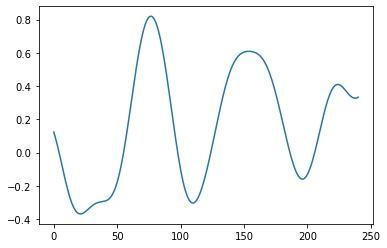

In [6]:
plt.plot(start_data.loc[0])

In [7]:
rms = lambda x_seq: (sum(x*x for x in x_seq)/len(x_seq))**(1/2)


In [8]:
rms_values = np.array([rms(np.array(start_data.loc[i])*10**3) for i in range(len(start_data))])

In [9]:
rms_values[np.where(rms_values<0.35)]

array([], dtype=float64)

In [10]:
len(rms_values[np.where(rms_values<0.35)])

0

In [11]:
int_rms = rms_values[np.where(rms_values<0.35)]
look_at_rms = np.linspace(int_rms.min(),int_rms.max(),10000)

ValueError: zero-size array to reduction operation minimum which has no identity

In [12]:
start_data.loc[np.where(rms_values<0.35)].to_csv('new_defects.csv')

In [158]:
new_start_data = np.array(start_data*10**3)

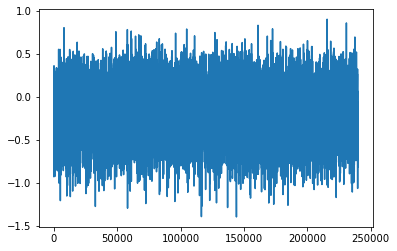

In [159]:
plt.plot(new_start_data[0])

In [90]:
import statsmodels.api as sm
import seaborn as sns
from scipy.signal import hilbert

In [153]:
long_defect = np.array(pd.read_csv('new_defects.csv').drop(columns=['Unnamed: 0']))

long_defect = np.array([long_defect[i]-long_defect[i,-1] for i in range(len(long_defect))])


In [160]:
def find_lagmin(long_defect):
    autocorr_i = sm.tsa.acf(long_defect,nlags=len(long_defect))/np.var(long_defect)
    #autocorr_i = autocorr_i/autocorr_i[0]
    try:
        autocorr_i = autocorr_i[:np.where(autocorr_i<0)[0][0]]
    except:
        print('ok')
    return np.argmin(np.abs(autocorr_i-1/np.exp(1)))


In [161]:
lag_min_list = np.array([find_lagmin(long_defect[i]) for i in range(len(long_defect))])

/Users/paialupo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


/Users/paialupo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


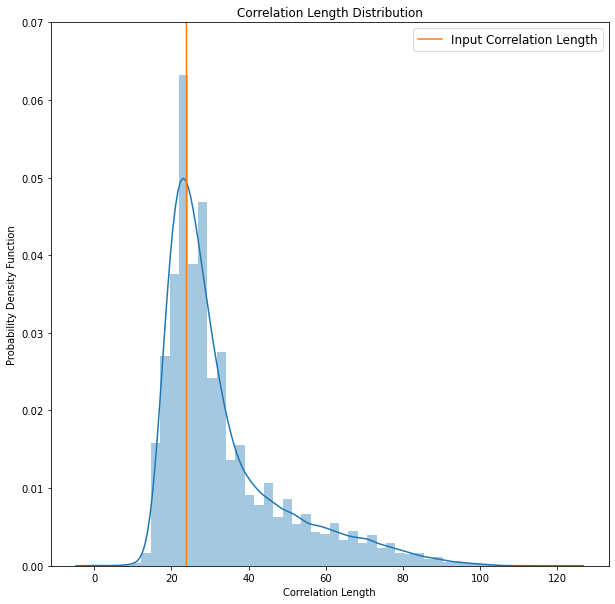

In [174]:
plt.figure(figsize=(10,10))
plt.title('Correlation Length Distribution')
sns.distplot(lag_min_list)
plt.plot(np.zeros(2000)+23.9,np.linspace(0,1,2000),label='Input Correlation Length')
plt.xlabel('Correlation Length')
plt.ylabel('Probability Density Function')
plt.ylim(0,0.07)
plt.legend(fontsize=12)

In [157]:
pd.DataFrame(lag_min_list).describe()

,0
count,100000.000000
mean,20.228970
std,6.384488
min,8.000000
25%,16.000000
50%,19.000000
75%,23.000000
max,79.000000


In [105]:
lag_min

array([12])

In [106]:
lag_min

array([12])

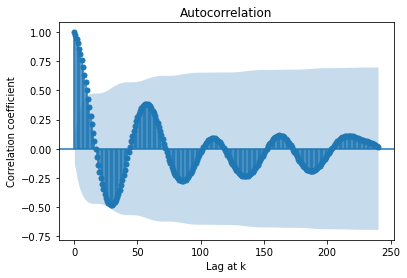

In [113]:
from statsmodels.graphics import tsaplots


# Stands for Time Series Analysis Plots (TSA Plots)
fig = tsaplots.plot_acf(long_defect, lags=240)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

In [107]:
autocorr_i = sm.tsa.acf(long_defect,nlags=len(long_defect))/np.var(long_defect)



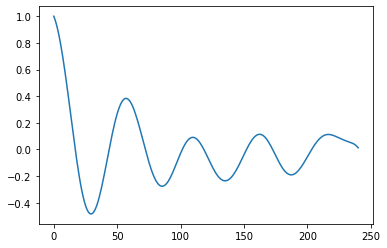

In [108]:
plt.plot(autocorr_i/autocorr_i[0])

In [172]:
autocorr_i = sm.tsa.acf(new_start_data[i],nlags=len(new_start_data[0]))/np.var(new_start_data[i])



/Users/paialupo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


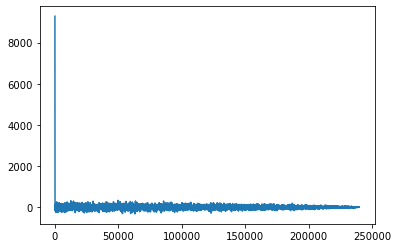

In [173]:
plt.plot(autocorr_i)

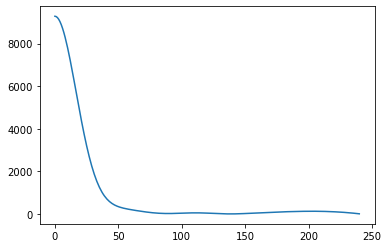

In [170]:
plt.plot(autocorr_i)

In [162]:
autocorr_i = sm.tsa.acf(new_start_data[0],nlags=len(new_start_data))/np.var(new_start_data[0])



In [164]:
autocorr_i

array([11.27369768, 11.25335515, 11.19269679])

In [132]:
autocorr_i

array([72.8527458 , 72.65891967, 72.22363556, 71.55123517, 70.64868187,
       69.52540796, 68.19316526, 66.66580388, 64.95902287, 63.09010828,
       61.07762206, 58.94110505, 56.70074082, 54.37704826, 51.9905487 ,
       49.56147713, 47.10949397, 44.65342271, 42.211016  , 39.79876109,
       37.43170684, 35.12333673, 32.88547326, 30.72820771, 28.65990146,
       26.68716777, 24.81493188, 23.04647334, 21.38353525, 19.82642761,
       18.37414411, 17.02451115, 15.77432028, 14.61949501, 13.5552223 ,
       12.57612889, 11.67640088, 10.84994799, 10.09051715,  9.39182597,
        8.74766513,  8.15200279,  7.59906941,  7.08343346,  6.60005019,
        6.14432635,  5.71213714,  5.29986183,  4.90438457,  4.52310116,
        4.1539167 ,  3.79520302,  3.44580097,  3.10496317,  2.77233378,
        2.4478956 ,  2.13192159,  1.82491836,  1.52759906,  1.24080559,
        0.96546886,  0.70256338,  0.45304661,  0.2178366 ])

/Users/paialupo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


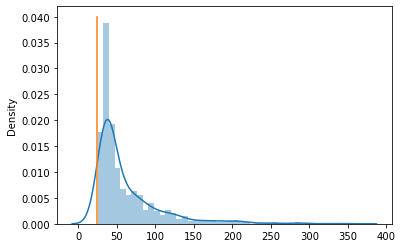

In [131]:
sns.distplot(lag_min)
plt.plot(np.zeros(1000)+23.9,np.linspace(0,0.040,1000))
#plt.plot(np.zeros(1000)+35,np.linspace(0,0.040,1000))

/Users/paialupo/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


([<matplotlib.axis.XTick at 0x7fa429ae3520>], [Text(0, 0, '')])

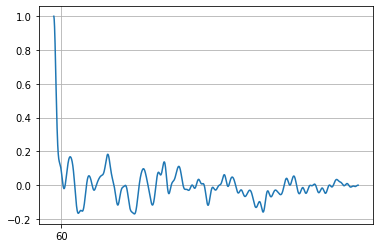

In [136]:
plt.plot(sm.tsa.acf(new_start_data[0],nlags=len(new_start_data[0])))
plt.grid(True)
plt.xticks([60])

In [137]:
lag_min[0]

66

In [201]:
Q = np.array([1000,2,3,10])
np.delete(Q,0)

array([ 2,  3, 10])